In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
pickle_file = "clean_books_10k.pkl"
csv_file = "clean_books_10k.csv"
if os.path.exists(pickle_file):
    # upload from pickle_file (faster)
    df = pd.read_pickle(pickle_file)
    print(f"pickle file read!")
else:
    # read the .csv file (slower)
    usecols = ["product_id", "product_title", "star_rating", 
           "helpful_votes", "total_votes", 
           "review_headline", "review_body", "review_date"]
    df = pd.read_csv("books.tsv", sep="\t", usecols=usecols, on_bad_lines="skip")

    # Remove reviews with "review_headline" empty
    df = df[df["review_headline"] != "[null]"]
    print(f"tsv file read!")


pickle file read!


In [3]:
# show few lines of the table
df.head()

,product_id,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date
929,0312977379,Beware the Night,4.0,61.0,79.0,A book that actually gives you a shiver,Unlike many books on the subject of the supern...,2005-10-13
1111,1420832158,JEET KUNE DO: THE SYSTEM WITHOUT A SYSTEM®,5.0,1.0,4.0,Something For Everyone,This book is the only Jeet Kune Do reference m...,2005-10-13
1474,0312977379,Beware the Night,5.0,12.0,18.0,Beware the Night,"When I started the book, I would read it outsi...",2005-10-13
1585,0312336853,Shooter: The Autobiography of the Top-Ranked M...,5.0,1.0,4.0,Hard to put this one down,"This book has some characteristics of \\""Black...",2005-10-13
1947,0756607574,Panties,4.0,5.0,12.0,A Nice Read,"This book is a small on, it is pack with lots ...",2005-10-13


In [4]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 929 to 3105322
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       10000 non-null  object 
 1   product_title    10000 non-null  object 
 2   star_rating      10000 non-null  float64
 3   helpful_votes    10000 non-null  float64
 4   total_votes      10000 non-null  float64
 5   review_headline  10000 non-null  object 
 6   review_body      10000 non-null  object 
 7   review_date      10000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 703.1+ KB


In [5]:
# some statistics
df.describe(include="all")

,product_id,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date
count,10000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000
unique,546,361,NaN,NaN,NaN,9390,9888,2669
top,0071381392,The No-Cry Sleep Solution: Gentle Ways to Help...,NaN,NaN,NaN,Great Book,This collection is a well done groups of thoug...,2004-11-12
freq,385,385,NaN,NaN,NaN,22,5,59
mean,NaN,NaN,4.114000,10.794800,14.476100,NaN,NaN,NaN
std,NaN,NaN,1.298142,39.647261,44.489965,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.000000,2.000000,NaN,NaN,NaN
50%,NaN,NaN,5.000000,4.000000,6.000000,NaN,NaN,NaN
75%,NaN,NaN,5.000000,10.000000,14.000000,NaN,NaN,NaN


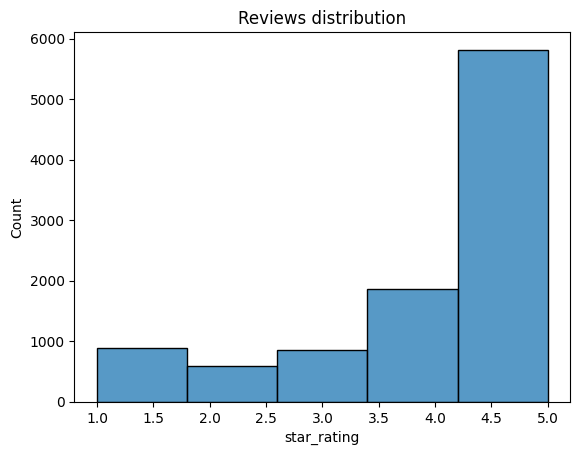

In [7]:
# ratings distribution
sns.histplot(df["star_rating"], bins=5)
plt.title("Reviews distribution")
plt.show()

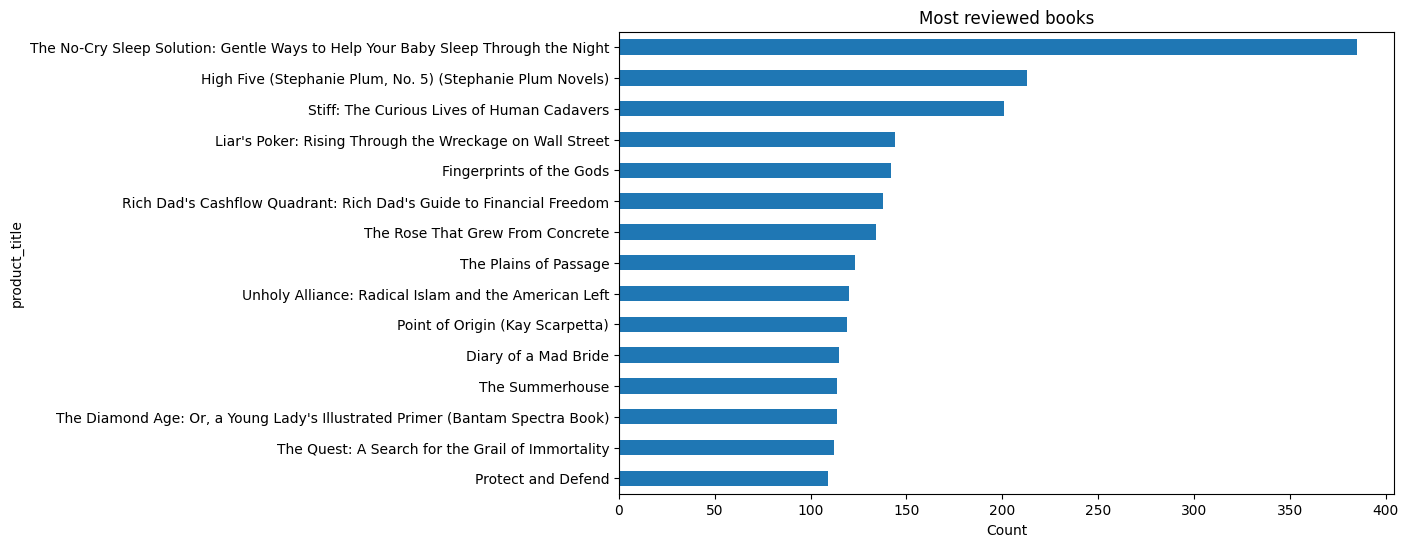

In [7]:
# Unique titles occurencies
title_counts = df["product_title"].value_counts()
top_books = title_counts.head(15)

plt.figure(figsize=(10,6))
top_books.plot(kind="barh")
plt.gca().invert_yaxis() 
plt.xlabel("Count")
plt.title("Most reviewed books")
plt.show()

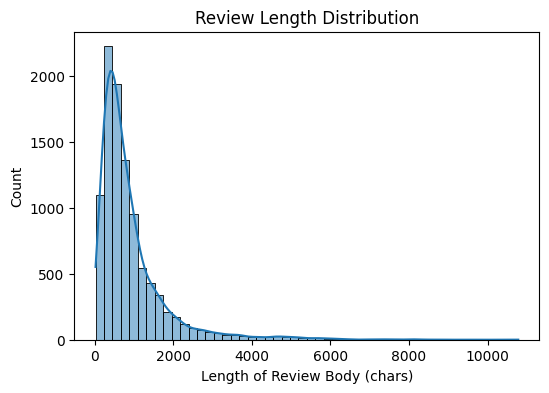

In [8]:
# distribution of the length of the reviews
df["review_length"] = df["review_body"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review Body (chars)")
plt.ylabel("Count")
plt.show()

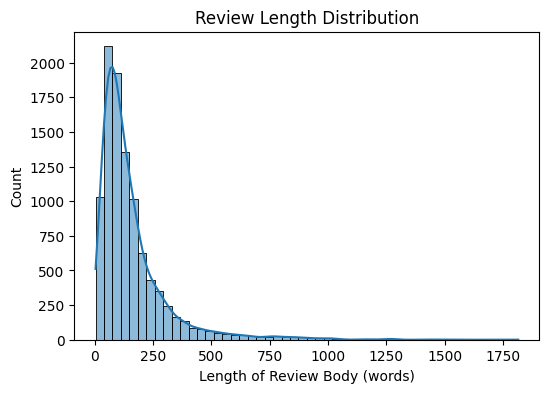

In [15]:
df["review_length_words"] = df["review_body"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(df["review_length_words"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review Body (words)")
plt.ylabel("Count")
plt.show()

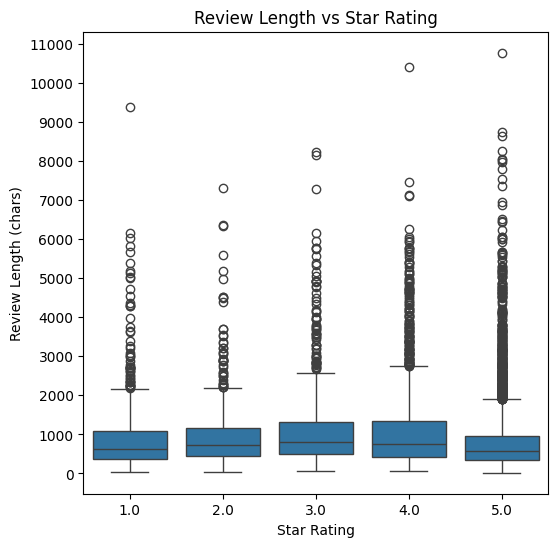

In [23]:
# Reviews length in the different classes
plt.figure(figsize=(6,6))
sns.boxplot(x="star_rating", y="review_length", data=df)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000])
plt.title("Review Length vs Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Review Length (chars)")
plt.show()

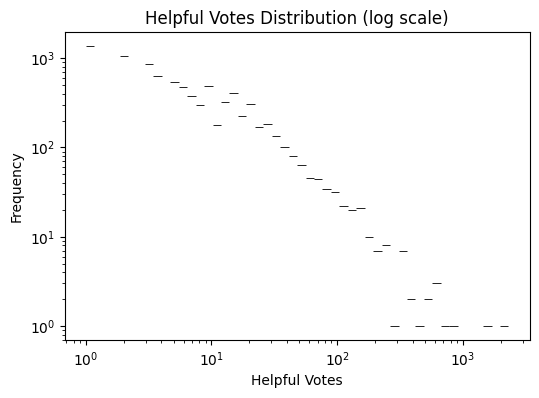

In [13]:
# helpful votes distribution
plt.figure(figsize=(6,4))
sns.histplot(df["helpful_votes"], bins=50, log_scale=(True, True))
plt.title("Helpful Votes Distribution (log scale)")
plt.xlabel("Helpful Votes")
plt.ylabel("Frequency")
plt.show()

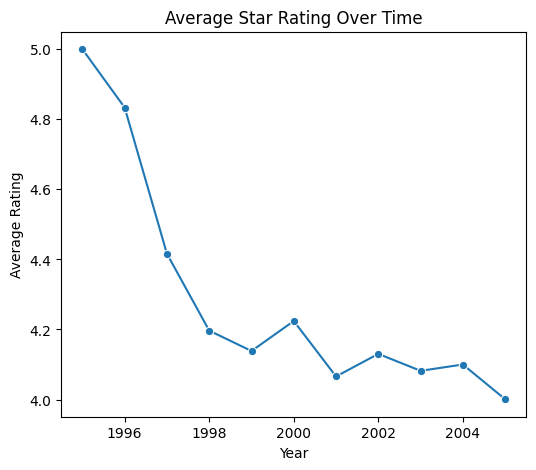

In [5]:
# Average star rating over time
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")
df["year"] = df["review_date"].dt.year

yearly_avg = df.groupby("year")["star_rating"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.lineplot(x="year", y="star_rating", data=yearly_avg, marker="o")
plt.title("Average Star Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

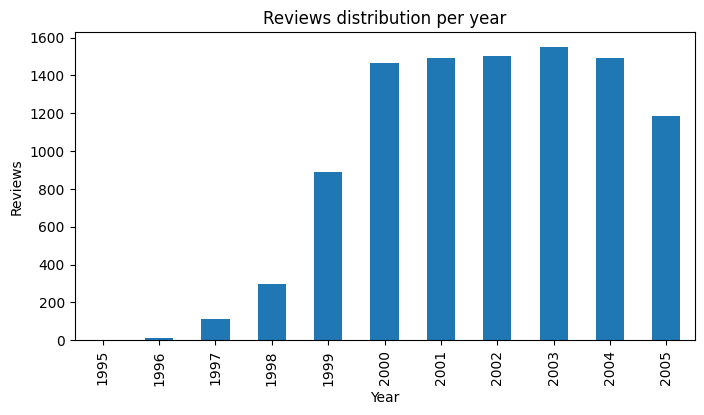

In [13]:
df["review_date"] = pd.to_datetime(df["review_date"])

reviews_per_year = df.groupby(df["review_date"].dt.year).size()

reviews_per_year.plot(kind="bar", figsize=(8,4))
plt.xlabel("Year")
plt.ylabel("Reviews")
plt.title("Reviews distribution per year")
plt.show()

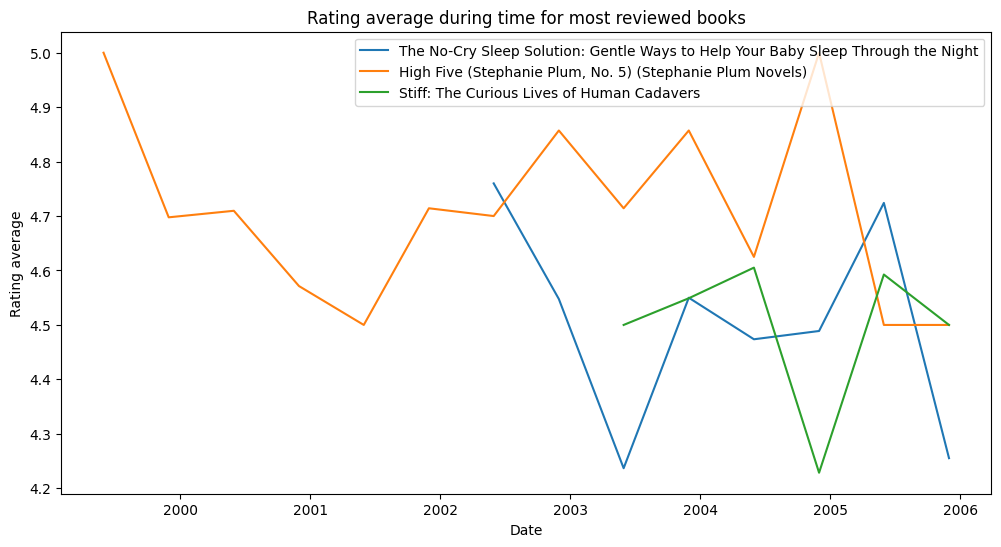

In [33]:
# Average star rating (for the most reviewed book)

top_books = df["product_title"].value_counts().head(3).index.tolist()

# Check data is in "datetime" format
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Filter for only chosen books
df_top = df[df["product_title"].isin(top_books)]

# Rating average value for each book every 6 months
trend = (
    df_top.groupby([pd.Grouper(key="review_date", freq="6M"), "product_title"])
    ["star_rating"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
for book in top_books:
    subset = trend[trend["product_title"] == book]
    plt.plot(subset["review_date"], subset["star_rating"], label=book)

plt.xlabel("Date")
plt.ylabel("Rating average")
plt.title("Rating average during time for most reviewed books")
plt.legend()
plt.show()